In [7]:
import numpy as np
import matplotlib.pyplot as plt

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

/home/yangziqi/.conda/envs/openmmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('./mmsegmentation/configs/pspnet_Glomeruli/pspnet_r50_Glomeruli.py')

In [9]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

02/14 04:22:59 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.8 (default, Feb 24 2021, 21:46:12) [GCC 7.3.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0,1,2,3: NVIDIA GeForce RTX 3090
    CUDA_HOME: /home/yangziqi/.conda/envs/openmmlab
    NVCC: Cuda compilation tools, release 11.6, V11.6.124
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.13.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.6
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;ar

/data/yangziqi/openmmlab/assignment_03/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/data/yangziqi/openmmlab/assignment_03/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/data/yangziqi/openmmlab/assignment_03/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/data/yangziqi/openmmlab/assignment_03/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore``

02/14 04:23:03 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
02/14 04:23:03 - mmengine - WARNING - The "hook" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/14 04:23:03 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook  

/data/yangziqi/openmmlab/assignment_03/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [10]:
# 初始化模型
checkpoint_path = './mmsegmentation/work/pspnet_r50_Glomeruli/iter_400.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: ./mmsegmentation/work/pspnet_r50_Glomeruli/iter_400.pth


In [11]:
img = mmcv.imread('mmsegmentation/data/Glomeruli-dataset/images/VUHSK_1702_39.png')

# 用训练好的语义分割预测

In [12]:
result = inference_model(model, img)

02/14 04:23:12 - mmengine - WARNING - The "transform" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.


In [13]:
result.keys()

['seg_logits', 'pred_sem_seg']

In [14]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [15]:
pred_mask.shape

(1024, 1024)

In [16]:
np.unique(pred_mask)

array([0, 1])

# 可视化语义分割预测结果

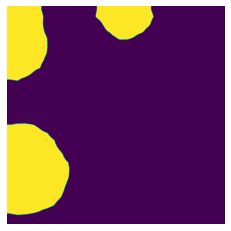

In [17]:
plt.imshow(pred_mask)
plt.axis('off')
plt.show()

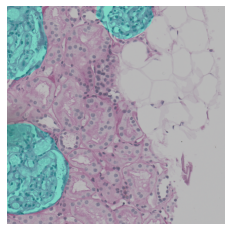

In [41]:
# 与原图重叠可视化
visualization = show_result_pyplot(model, img, result, opacity=0.5, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.axis('off')
plt.show()

# 语义分割预测结果-连通域分析

In [19]:
connected = cv2.connectedComponentsWithStats(np.uint8(pred_mask), connectivity=4)
# 连通域个数（第一个有可能是全图，可以忽略）
connected

(4,
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 array([[     0,      0,   1024,   1024, 857159],
        [     0,      0,    190,    351,  57189],
        [   416,      0,    272,    158,  32661],
        [     0,    551,    293,    431, 101567]], dtype=int32),
 array([[584.28483047, 520.9504211 ],
        [ 84.26368707, 164.58537481],
        [553.9661676 ,  65.61351459],
        [124.15034411, 770.4648754 ]]))

In [20]:
# 4表示连通域个数（第一个array有可能是全图，可以忽略）
# 用整数表示每个连通域区域
connected[1].shape

(1024, 1024)

In [21]:
np.unique(connected[1])

array([0, 1, 2, 3], dtype=int32)

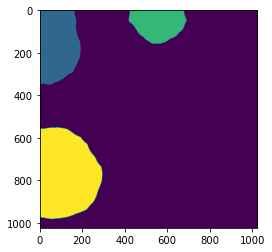

In [22]:
plt.imshow(connected[1])
plt.show()

In [23]:
# 第二个array：每个连通域外接矩形的左上角X、左上角Y、宽度、高度、面积
connected[2]

array([[     0,      0,   1024,   1024, 857159],
       [     0,      0,    190,    351,  57189],
       [   416,      0,    272,    158,  32661],
       [     0,    551,    293,    431, 101567]], dtype=int32)

In [24]:
# 第三个array：每个连通域的质心坐标
connected[3]

array([[584.28483047, 520.9504211 ],
       [ 84.26368707, 164.58537481],
       [553.9661676 ,  65.61351459],
       [124.15034411, 770.4648754 ]])

# 获取测试集标注

In [25]:
label = mmcv.imread('mmsegmentation/data/Glomeruli-dataset/masks/VUHSK_1702_39.png')
label_mask = label[:,:,0]
label_mask.shape

(1024, 1024)

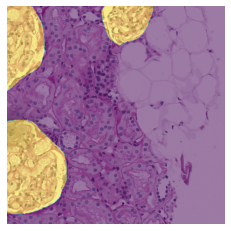

In [49]:
plt.imshow(mmcv.bgr2rgb(img))
plt.imshow(label_mask*255, alpha=0.5)
plt.axis('off')
plt.show()

# 对比标注和预测结果

In [31]:
# 真实为前景，预测为前景
TP = (label_mask == 1) & (pred_mask==1)

# 真实为背景，预测为背景
TN = (label_mask == 0) & (pred_mask==0)

# 真实为前景，预测为背景
FN = (label_mask == 1) & (pred_mask==0)

# 真实为背景，预测为前景
FP = (label_mask == 0) & (pred_mask==1)

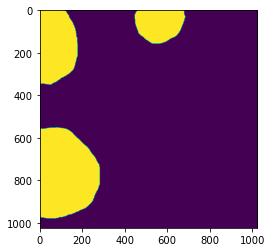

In [32]:
plt.imshow(TP)
plt.show()

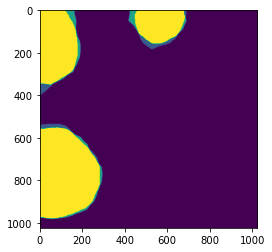

In [33]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 10
plt.imshow(confusion_map)
plt.show()

# 混淆矩阵

In [3]:
!pip install scikit-learn

     |████████████████████████████████| 9.8 MB 984 kB/s eta 0:00:01     |████▏                           | 1.3 MB 984 kB/s eta 0:00:09��█████████████▌      | 7.8 MB 984 kB/s eta 0:00:03
     |████████████████████████████████| 297 kB 41.6 MB/s eta 0:00:01


In [34]:
from sklearn.metrics import confusion_matrix
import itertools

In [35]:
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))
    
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)
    
    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

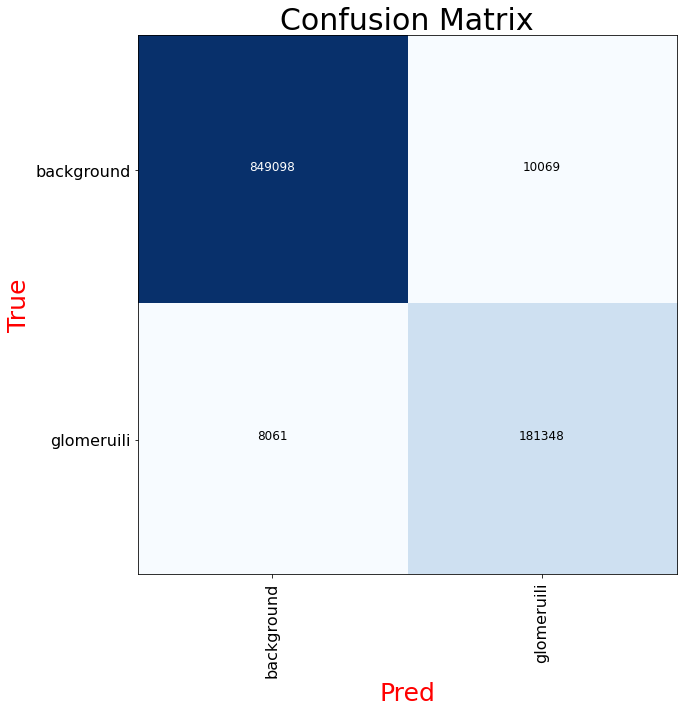

In [39]:
classes = ('background', 'glomeruili')
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')